In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [7]:
chessboard = (9, 6) # (corners in a row, corners in a column)

In [8]:
objp = np.zeros((chessboard[0]*chessboard[1], 3), np.float32)
# fixed corner coordinates
objp[:,:2] = np.mgrid[0:chessboard[0], 0:chessboard[1]].T.reshape(-1, 2)

In [9]:
import glob
images = glob.glob('camera_cal/calibration*.jpg')

In [10]:
#f, axs = plt.subplots(len(images), 2, figsize=(24, 10*len(images)//2))
#f.tight_layout()
#axs = axs.reshape(-1)
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane

for i, fpath in enumerate(images):
    img = cv2.imread(fpath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, chessboard, None)
    
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
    
        #cv2.drawChessboardCorners(img, chessboard, corners, ret)
        #axs[i*2].imshow(img)

In [11]:
image = mpimg.imread('camera_cal/calibration1.jpg')
img_shape = image.shape[:2][::-1]
# get the camera calibration matrix based the calibration pattern in objpoints->imgpoints
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_shape, None, None)

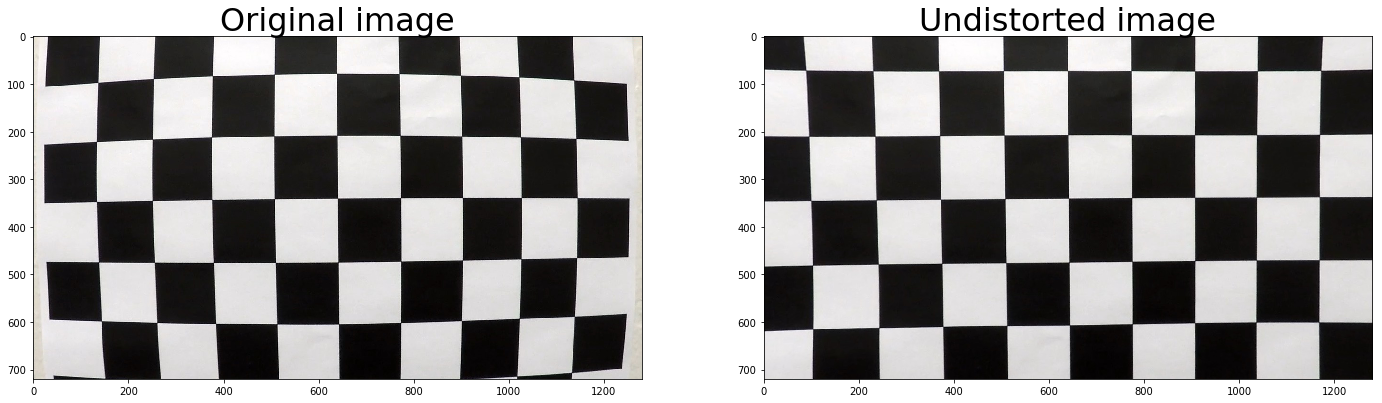

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 20))
ax1.imshow(image)
ax1.set_title('Original image', fontsize=32)
ax2.imshow(cv2.undistort(image, mtx, dist, None, mtx))
ax2.set_title('Undistorted image', fontsize=32)

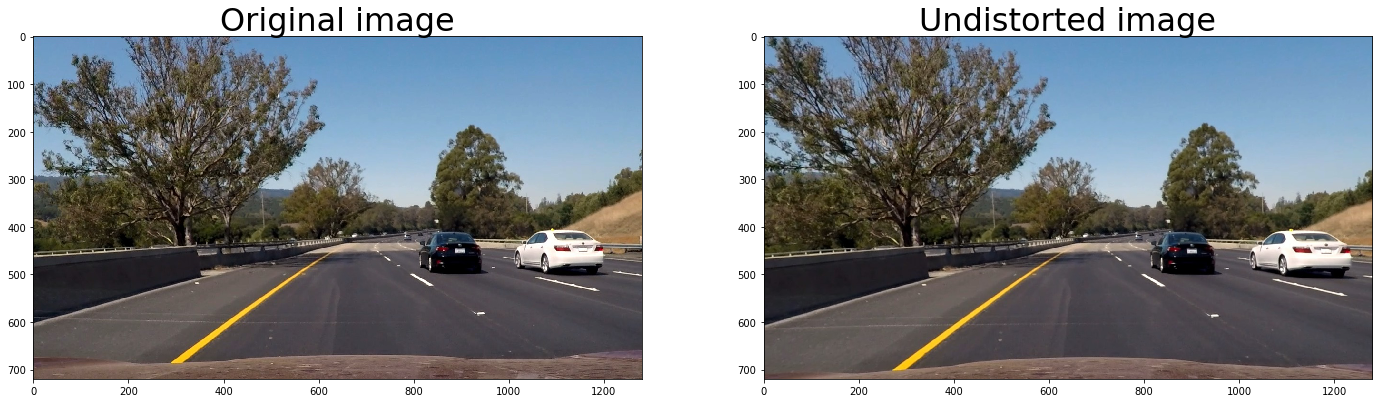

In [14]:
test_image = mpimg.imread('test_images/test6.jpg')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 20))
ax1.imshow(test_image)
ax1.set_title('Original image', fontsize=32)
ax2.imshow(cv2.undistort(test_image, mtx, dist, None, mtx))
ax2.set_title('Undistorted image', fontsize=32)